In [56]:
# imporing packages

import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
import math
import seaborn as sb


In [57]:
################################################################
############################## Q2 ##############################
############################ Part a ############################

df = pd.read_csv('international_matches.csv')
df.iloc[-10:,:]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


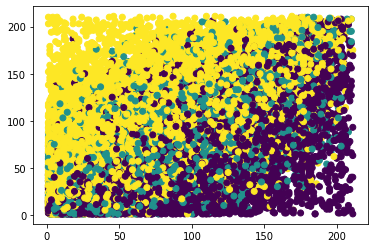

In [58]:
############################ Part b ############################

newdf = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_result']].copy()

newdf['home_team_result'] = newdf['home_team_result'].replace(['Lose'], 0)
newdf['home_team_result'] = newdf['home_team_result'].replace(['Draw'], 1)
newdf['home_team_result'] = newdf['home_team_result'].replace(['Win'], 2)

f = plt.scatter(newdf['home_team_fifa_rank'], newdf['away_team_fifa_rank'],\
            c=newdf['home_team_result'])
plt.show()

In [59]:
############################ Part c ############################

df_f1 = df[df['home_team_total_fifa_points'] > 0]
dff = df_f1[df_f1['away_team_total_fifa_points'] > 0]
ndff = dff[['home_team_total_fifa_points', 'home_team_fifa_rank',\
            'away_team_total_fifa_points', 'away_team_fifa_rank',\
            'home_team_result']].copy()

ndff['home_team_result'] = ndff['home_team_result'].replace(['Lose'], 0)
ndff['home_team_result'] = ndff['home_team_result'].replace(['Draw'], 1)
ndff['home_team_result'] = ndff['home_team_result'].replace(['Win'], 2)

shuffled = ndff.sample(frac=1).reset_index()
l = math.ceil(len(shuffled)*0.75)

traindf = shuffled.iloc[:l,:].copy()
testdf = shuffled.iloc[l:,:].copy()

trainf = traindf.iloc[:,:5].copy()
trainl = traindf.iloc[:,5].copy()
testf = testdf.iloc[:,:5].copy()
testl = testdf.iloc[:,5].copy()

trainf.to_csv('trainf.csv')
testf.to_csv('testf.csv')

trainl.to_csv('trainl.csv')
testl.to_csv('testl.csv')


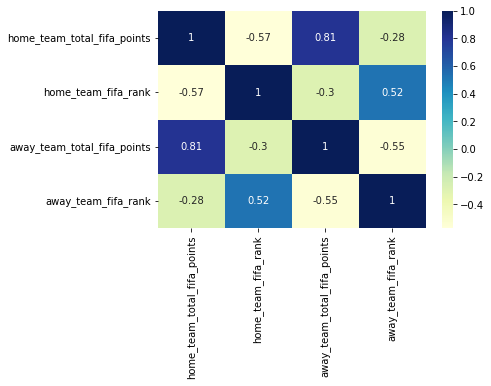

In [60]:
############################ Part d ############################
mp=sb.heatmap(ndff.iloc[:,:4].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [61]:
class CustomImageDataset(Dataset):
    
    def __init__(self, labels, features, transform=None, target_transform=None):
        self.labels = labels.float()
        self.features = features.float()
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        feature = self.features[idx,:]
        label = self.labels[idx]
        if self.transform:
            feature = self.transform(feature)
        if self.target_transform:
            label = self.target_transform(label)
        return feature, label

labeldf = pd.read_csv("trainl.csv")
feadf = pd.read_csv("trainf.csv")

label_tensor = torch.tensor(labeldf.iloc[:,1].values)
feature_tensor = torch.tensor(feadf.iloc[:,2:6].values)

telabeldf = pd.read_csv("testl.csv")
tefeadf = pd.read_csv("testf.csv")
test_label_tensor = torch.tensor(telabeldf.iloc[:,1].values)
test_feature_tensor = torch.tensor(tefeadf.iloc[:,2:6].values)

label_tensor = label_tensor.type(torch.DoubleTensor)
feature_tensor = feature_tensor.type(torch.DoubleTensor)
test_label_tensor = test_label_tensor.type(torch.DoubleTensor)
test_feature_tensor = test_feature_tensor.type(torch.DoubleTensor)

label_tensorS = torch.zeros(len(label_tensor), 3)
test_label_tensorS = torch.zeros(len(test_label_tensor), 3)

for i in range(len(label_tensorS)):
    if label_tensor[i]==0:
        label_tensorS[i,0]=1
    if label_tensor[i]==1:
        label_tensorS[i,1]=1
    if label_tensor[i]==2:
        label_tensorS[i,2]=1

for i in range(len(test_label_tensorS)):
    if test_label_tensor[i]==0:
        test_label_tensorS[i,0]=1
    if test_label_tensor[i]==1:
        test_label_tensorS[i,1]=1
    if test_label_tensor[i]==2:
        test_label_tensorS[i,2]=1

label_tensorS = torch.tensor(label_tensorS, dtype=torch.float32)

test_label_tensorS = torch.tensor(test_label_tensorS, dtype=torch.float32)


train_custom_dataset = CustomImageDataset(label_tensorS, feature_tensor)
test_custom_dataset = CustomImageDataset(test_label_tensorS, test_feature_tensor)


training_data = train_custom_dataset
test_data = test_custom_dataset

train_dataloader = DataLoader(training_data, batch_size=30, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=30, shuffle=True)


/var/folders/ff/qxszjwmn44l0t4x19tjpx3dr0000gn/T/ipykernel_1652/2307977367.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensorS = torch.tensor(label_tensorS, dtype=torch.float32)
/var/folders/ff/qxszjwmn44l0t4x19tjpx3dr0000gn/T/ipykernel_1652/2307977367.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_label_tensorS = torch.tensor(test_label_tensorS, dtype=torch.float32)


In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [63]:
############################ Part e ############################
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.Softmax()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [64]:
model = NeuralNetwork().to(device)

In [65]:
############################ Part f ############################
learning_rate = 1e-2
batch_size = 30
epochs = 45
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

model = NeuralNetwork().to(device)

model.train()


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 50 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.233412  [    0/ 7196]
loss: 1.091288  [ 1500/ 7196]
loss: 1.074386  [ 3000/ 7196]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


loss: 1.049300  [ 4500/ 7196]
loss: 0.959905  [ 6000/ 7196]
Test Error: 
 Accuracy: 54.4%, Avg loss: 0.986766 

Epoch 2
-------------------------------
loss: 1.086571  [    0/ 7196]
loss: 0.855812  [ 1500/ 7196]
loss: 0.971588  [ 3000/ 7196]
loss: 0.889417  [ 4500/ 7196]
loss: 0.895528  [ 6000/ 7196]
Test Error: 
 Accuracy: 53.0%, Avg loss: 0.985726 

Epoch 3
-------------------------------
loss: 0.858397  [    0/ 7196]
loss: 0.952539  [ 1500/ 7196]
loss: 1.085037  [ 3000/ 7196]
loss: 1.048526  [ 4500/ 7196]
loss: 0.976893  [ 6000/ 7196]
Test Error: 
 Accuracy: 53.4%, Avg loss: 0.982796 

Epoch 4
-------------------------------
loss: 0.979373  [    0/ 7196]
loss: 0.940955  [ 1500/ 7196]
loss: 1.054083  [ 3000/ 7196]
loss: 0.945270  [ 4500/ 7196]
loss: 0.850926  [ 6000/ 7196]
Test Error: 
 Accuracy: 53.6%, Avg loss: 1.000701 

Epoch 5
-------------------------------
loss: 1.024465  [    0/ 7196]
loss: 0.932615  [ 1500/ 7196]
loss: 0.997096  [ 3000/ 7196]
loss: 0.887661  [ 4500/ 7196]
lo

loss: 1.056780  [ 4500/ 7196]
loss: 0.951945  [ 6000/ 7196]
Test Error: 
 Accuracy: 54.8%, Avg loss: 0.975532 

Epoch 36
-------------------------------
loss: 1.104043  [    0/ 7196]
loss: 1.088489  [ 1500/ 7196]
loss: 0.955469  [ 3000/ 7196]
loss: 1.022661  [ 4500/ 7196]
loss: 0.886172  [ 6000/ 7196]
Test Error: 
 Accuracy: 55.4%, Avg loss: 0.972311 

Epoch 37
-------------------------------
loss: 0.978061  [    0/ 7196]
loss: 0.825752  [ 1500/ 7196]
loss: 0.959319  [ 3000/ 7196]
loss: 0.974487  [ 4500/ 7196]
loss: 0.956459  [ 6000/ 7196]
Test Error: 
 Accuracy: 55.6%, Avg loss: 0.973128 

Epoch 38
-------------------------------
loss: 0.927227  [    0/ 7196]
loss: 0.872633  [ 1500/ 7196]
loss: 1.004864  [ 3000/ 7196]
loss: 0.953638  [ 4500/ 7196]
loss: 0.854768  [ 6000/ 7196]
Test Error: 
 Accuracy: 55.1%, Avg loss: 0.974222 

Epoch 39
-------------------------------
loss: 0.855725  [    0/ 7196]
loss: 0.957721  [ 1500/ 7196]
loss: 1.025283  [ 3000/ 7196]
loss: 0.999478  [ 4500/ 7196

In [67]:
############################ Part g ############################

irn_eng = torch.Tensor([20,5,1564.61,1728.47])
irn_wal = torch.Tensor([20,19,1564.61,1569.82])
iran_us = torch.Tensor([20,16,1564.61,1627.48])


IrEn = torch.Tensor([1564.61, 20, 1728.47, 5])
IrWa = torch.Tensor([1564.61, 20, 1569.82, 19])
IrUs = torch.Tensor([1564.61, 20, 1627.48, 16])

pred1 = model(IrEn)
pred2 = model(IrWa)
pred3 = model(IrUs)

print("Probability of Iran Winning against England is:", pred1[2].item())
print("Probability of Iran Winning against Wales is:", pred2[2].item())
print("Probability of Iran Winning against U.S. is:", pred3[2].item())


Probability of Iran Winning against England is: 0.17254935204982758
Probability of Iran Winning against Wales is: 0.5823009014129639
Probability of Iran Winning against U.S. is: 0.30787473917007446
